In [2]:
import sys

sys.path.insert(1, '../')
from Prepare_Events_Functions import *
from Plot_events_functions import *

In [12]:
color_mapping_loading = {
    'F2': (0.0, 0.0, 1.0, 0.6),    # darkblue with 0.6 alpha
    'F1': (0.0, 0.6902, 1.0, 0.6), # deepskyblue with 0.6 alpha
    'C': (0.5, 0.5, 0.5, 0.6),     # grey with 0.6 alpha
    'B1': (0.8039, 0.0, 0.0, 0.6), # indianred with 0.6 alpha
    'B2': (0.5451, 0.0, 0.0, 0.6)}  # darkred with 0.6 alpha

quintile_mapping = {1: 'F2', 2: 'F1', 3: 'C', 4: 'B1', 5: 'B2'}
quintile_cats_loading = ['F2','F1', 'C', 'B1', 'B2']

In [5]:
# Define the list of identifiers
ids = ['bc005','bb189']

present_future_lookup = {'bc005': 'Present','bb189': 'Future'}

# Define the corresponding labels for each identifier
labels = [f'UKCP18_present ({id})' if present_future_lookup[id] == 'Present' else f'UKCP18_future ({id})' if present_future_lookup[id] == 'Future' else 'NIMROD' for id in ids]

In [10]:
# Dictionary to store the dataframes
dataframes = {}
dataframes_divisible_by5 = {}

for id in ids:
    if present_future_lookup[id] == 'Present':
        file_path = f"/nfs/a319/gy17m2a/PhD/ProcessedData/Profiles/UKCP18_30mins/Present/{id}/df_nonulls.pkl"
        file_path_inclnulls = f"/nfs/a319/gy17m2a/PhD/ProcessedData/Profiles/UKCP18_30mins/Present/{id}/df.pkl"
    elif present_future_lookup[id] == 'Future':
        file_path = f"/nfs/a319/gy17m2a/PhD/ProcessedData/Profiles/UKCP18_30mins/Future/{id}/df_nonulls.pkl"
        file_path_inclnulls = f"/nfs/a319/gy17m2a/PhD/ProcessedData/Profiles/UKCP18_30mins/Future/{id}/df.pkl"
    elif present_future_lookup[id] == 'NIMROD' :  
        file_path = f"/nfs/a319/gy17m2a/PhD/ProcessedData/Profiles/NIMROD_30mins/WholeYear/df_nonulls.pkl"
        file_path_inclnulls = f"/nfs/a319/gy17m2a/PhD/ProcessedData/Profiles/NIMROD_30mins/WholeYear/df.pkl"
    
    # Load the dataframe from the pickle file
    with open(file_path, 'rb') as f:
        df = pickle.load(f)
    
    # Apply the month extraction function
    df['month'] = df['times'].apply(extract_month)
    df['Loading_profile_steef'] =df['max_quintile_steef'].map(quintile_mapping)
    
    # Store the dataframe in the dictionary with the id as the key
    dataframes[id] = df
    dataframes_divisible_by5[id]  = df[df['precip'].apply(is_multiple_of_5)]

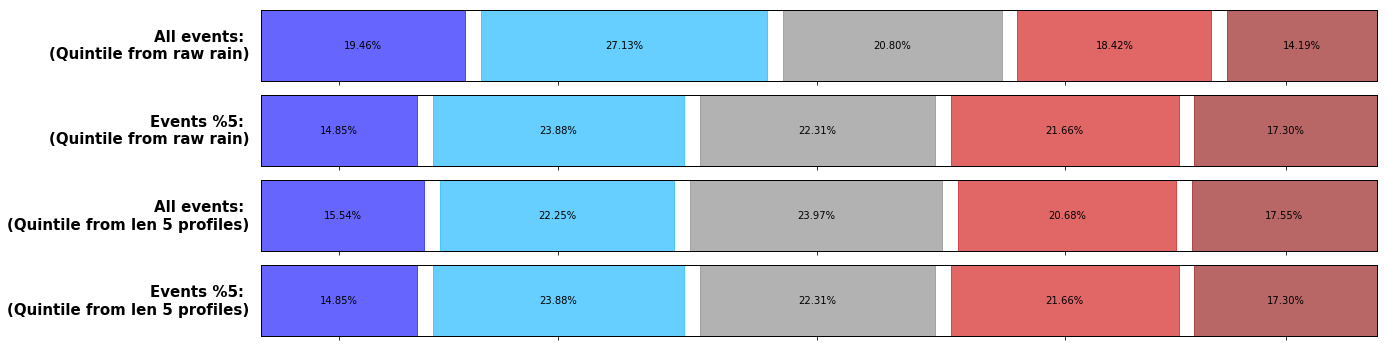

In [14]:
data = dataframes['bc005']
data_divisibleby5 = dataframes_divisible_by5['bc005']

fig, axs = plt.subplots(nrows=4, figsize=(20,6), sharex=True)
create_single_variable_mosaic_plot_pctlabels(axs[0], data,'Loading_profile_raw_rain',quintile_cats_loading, color_mapping_loading, 'All events: \n(Quintile from raw rain)',)
create_single_variable_mosaic_plot_pctlabels(axs[1], data_divisibleby5, 'Loading_profile_raw_rain',quintile_cats_loading, color_mapping_loading, 'Events %5: \n(Quintile from raw rain)')
create_single_variable_mosaic_plot_pctlabels(axs[2], data, 'Loading_profile_molly',quintile_cats_loading, color_mapping_loading, 'All events: \n(Quintile from len 5 profiles)')
create_single_variable_mosaic_plot_pctlabels(axs[3], data_divisibleby5, 'Loading_profile_molly',quintile_cats_loading, color_mapping_loading, 'Events %5: \n(Quintile from len 5 profiles)');

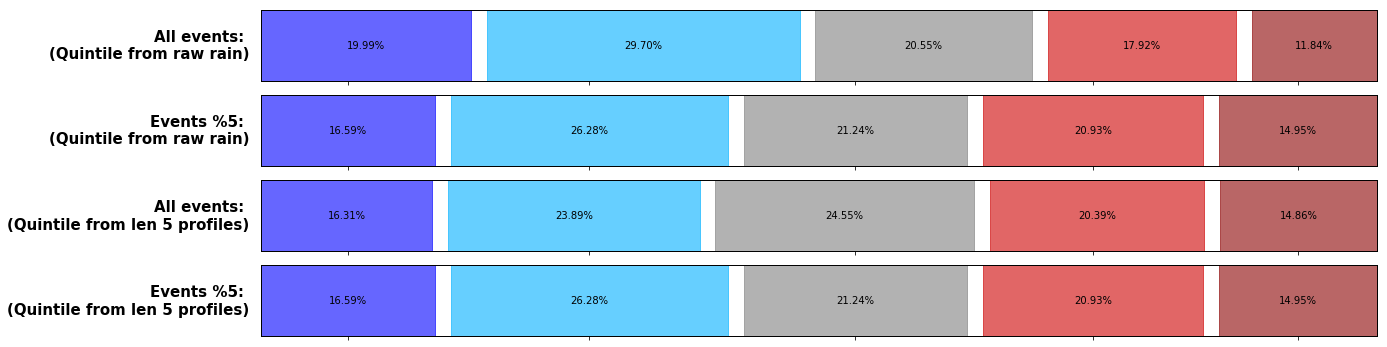

In [16]:
data = dataframes['bb189']
data_divisibleby5 = dataframes_divisible_by5['bb189']

fig, axs = plt.subplots(nrows=4, figsize=(20,6), sharex=True)
create_single_variable_mosaic_plot_pctlabels(axs[0], data,'Loading_profile_raw_rain',quintile_cats_loading, color_mapping_loading, 'All events: \n(Quintile from raw rain)')
create_single_variable_mosaic_plot_pctlabels(axs[1], data_divisibleby5, 'Loading_profile_raw_rain',quintile_cats_loading, color_mapping_loading, 'Events %5: \n(Quintile from raw rain)')
create_single_variable_mosaic_plot_pctlabels(axs[2], data, 'Loading_profile_steef',quintile_cats_loading, color_mapping_loading, 'All events: \n(Quintile from len 5 profiles)')
create_single_variable_mosaic_plot_pctlabels(axs[3], data_divisibleby5, 'Loading_profile_steef',quintile_cats_loading, color_mapping_loading, 'Events %5: \n(Quintile from len 5 profiles)');